In [1]:
# Installing medigan
!pip install medigan

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 52 kB 1.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 293 kB 33.1 MB/s 
     |████████████████████████████████| 856 kB 38.0 MB/s 
  Created wheel for medigan: filename=medigan-1.0.0-py3-none-any.whl size=58605 sha256=c5d407ed374afa37b92564630a06012bdfbe5bc2e905acfd15d6d88a66e506b6
  Stored in directory: /root/.cache/pip/wheels/22/a5/2c/b9bb19a1ff254af08920fabfc83a65e3e928ed4162a6a4f64e
Successfully built medigan


In [2]:
# Importing libraries
from medigan import Generators

In [25]:
from medigan import Generators
generators = Generators()
# model 4 is "00004_PIX2PIX_MMG_MASSES_W_MASKS"
dataloader = generators.get_as_torch_dataloader(model_id=4, num_samples=6, install_dependencies=True)

In [85]:
from tqdm import tqdm
def load_images(dataloader):
    
    images = []
    for batch_idx, data_dict in enumerate(dataloader):

        sample = np.squeeze(data_dict.get("sample"))
        mask = np.squeeze(data_dict.get("mask"))
        ims = np.hstack([sample, mask])
        
        images.append(ims)
        
    return images

In [93]:
def create_animation(ims):
    fig=plt.figure(figsize=(10,10))
    plt.axis('off')
    im=plt.imshow(ims[0],cmap="gray")

    def animate_func(i):
        im.set_array(ims[i])
        return [im]

    return animation.FuncAnimation(fig, animate_func, frames=len(ims), interval=1000)

In [89]:
from matplotlib import animation, rc
rc('animation', html='jshtml')
images = load_images(dataloader)

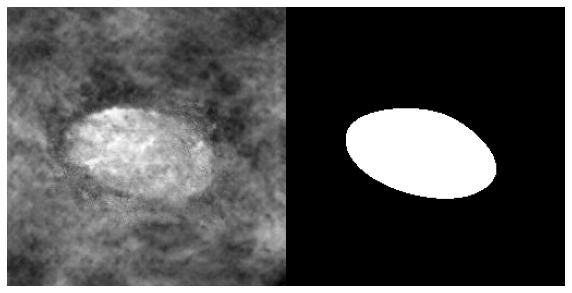

In [94]:
create_animation(images)